In [31]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np 
import pandas as pd
np.set_printoptions(threshold=100)





In [32]:
# Generating 2,000 readers' responses 
# Assuming the claps follow a Bernoulli process - a sequence of binary (success/failure) random variables.
# 1 means clap. 0 means no clap.
# We pick a success rate of 30%.
clap_prob = 0.3
# IID (independent and identically distributed) assumption
clap_data = np.random.binomial(n=1, p=clap_prob, size=2000)
clap_data

array([0, 0, 0, ..., 0, 1, 1])

In [33]:
a=400
b=2000-a

In [34]:
theta_range = np.linspace(0, 1, 1000)
isinstance(theta_range, np.ndarray)  # type(theta_range)

True

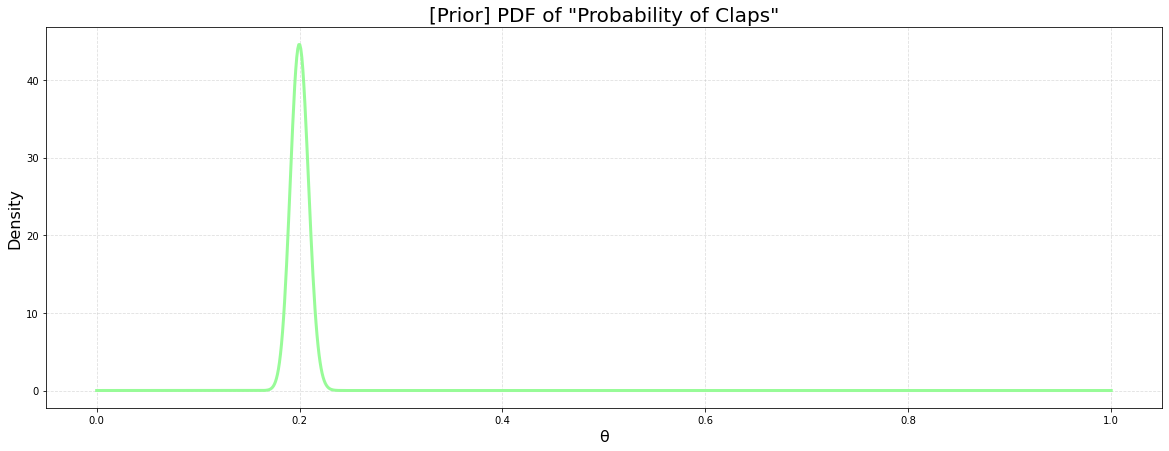

In [35]:
prior = stats.beta.pdf(x = theta_range, a=a, b=b)
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()
ax.plot(theta_range, prior, linewidth=3, color='palegreen')
# Add a title
ax.set_title('[Prior] PDF of "Probability of Claps"', fontsize=20)
# Add X and y Label
ax.set_xlabel('θ', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
# Add a grid
ax.grid(alpha=.4, linestyle='--')
# Show the plot
plt.show()


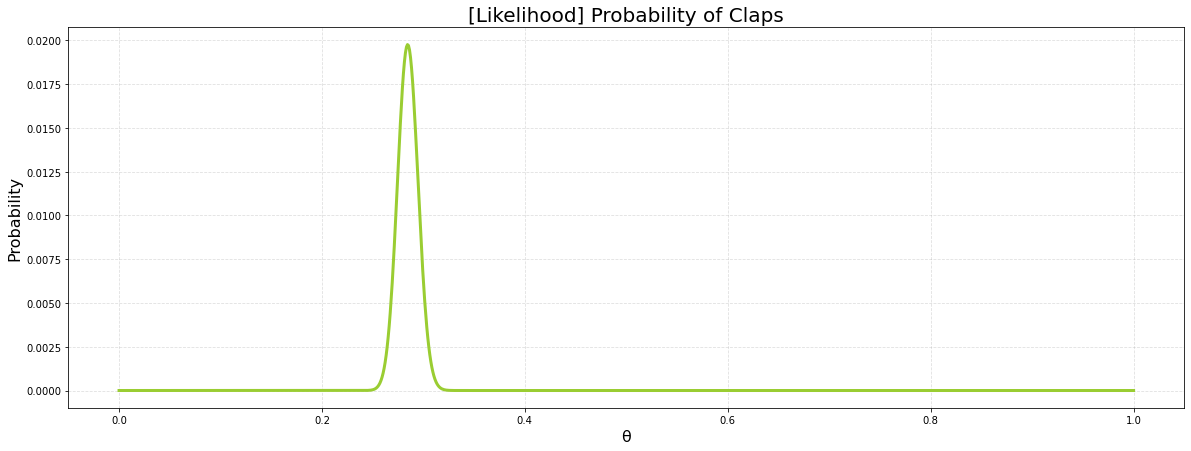

In [37]:
# Likelihood P(X|θ) for all θ's
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range)
# Create the plot
fig, ax = plt.subplots()
plt.plot(theta_range, likelihood, linewidth=3, color='yellowgreen')
# Add a title
plt.title('[Likelihood] Probability of Claps' , fontsize=20)
# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Probability', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
# Show the plot
plt.show()

In [38]:
theta_range_e = theta_range + 0.001 
prior = stats.beta.cdf(x = theta_range_e, a=a, b=b) - stats.beta.cdf(x = theta_range, a=a, b=b) 
# prior = stats.beta.pdf(x = theta_range, a=a, b=b)
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range) 
posterior = likelihood * prior # element-wise multiplication
normalized_posterior = posterior / np.sum(posterior)

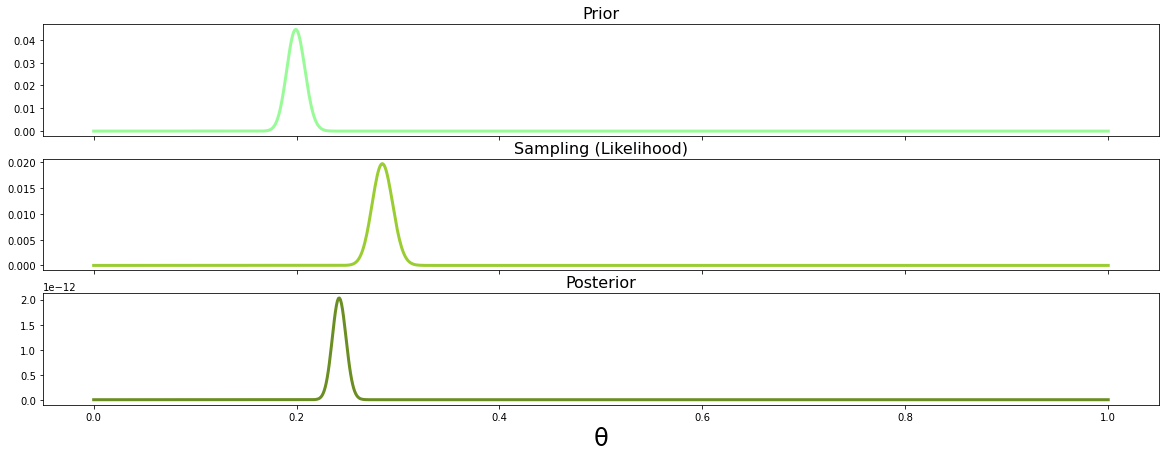

In [39]:
# Plotting all three together
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)
axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior", fontsize=16)
axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Sampling (Likelihood)", fontsize=16)
axes[2].plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
plt.show()